In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs

In [260]:
# set the dimensions
N = 100
D = 2
M = 4
K = 3

In [261]:
# set the initial weights
np.random.seed(1234)
W1 = np.random.randn(D,M)
b1 = np.random.randn(M)
W2 = np.random.randn(M,K)
b2 = np.random.randn(K)

In [262]:
print(W1.shape)
print(b1.shape)
print(W2.shape)
print(b2.shape)

(2, 4)
(4,)
(4, 3)
(3,)


In [263]:
print(W1)
print()
print(b1)

[[ 0.47143516 -1.19097569  1.43270697 -0.3126519 ]
 [-0.72058873  0.88716294  0.85958841 -0.6365235 ]]

[ 0.01569637 -2.24268495  1.15003572  0.99194602]


In [264]:
print(W2)
print()
print(b2)

[[ 0.95332413 -2.02125482 -0.33407737]
 [ 0.00211836  0.40545341  0.28909194]
 [ 1.32115819 -1.54690555 -0.20264632]
 [-0.65596934  0.19342138  0.55343891]]

[ 1.31815155 -0.46930528  0.67555409]


In [7]:
# X, t = make_classification(n_samples=N, n_features=D, n_classes=K, n_redundant=0, 
#                            n_informative=D, n_clusters_per_class=1)
X, t = make_blobs(n_features=2, centers=3)

In [8]:
print(X.shape)
print(t.shape)

(100, 2)
(100,)


In [9]:
X1 = pd.DataFrame(X, columns=['f1', 'f2'])
t1 = pd.DataFrame(t, columns=['target'])
df = pd.concat([X1, t1], axis=1)

## Graph

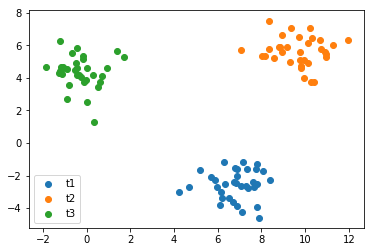

In [35]:
plt.scatter(df.loc[df['target']==0, 'f1'], df.loc[df['target']==0, 'f2'],
           label = 't1')
plt.scatter(df.loc[df['target']==1, 'f1'], df.loc[df['target']==1, 'f2'],
            label = 't2')
plt.scatter(df.loc[df['target']==2, 'f1'], df.loc[df['target']==2, 'f2'],
            label = 't3')
plt.legend()
plt.show()

## Log reg

In [265]:
def Z(X, W, b):
    return np.dot(X, W) + b

In [266]:
def sig(Z):
    return 1/(1+np.exp(-Z))

In [267]:
def soft(Z):
    exp_Z = np.exp(Z)
    return exp_Z/np.sum(exp_Z, axis=1, keepdims=True)

In [268]:
Z1 = Z(X, W1, b1)
Z1.shape

(100, 4)

In [269]:
y1 = sig(Z1)
y1.shape

(100, 4)

In [270]:
Z2 = Z(y1, W2, b2)
Z2.shape

(100, 3)

In [271]:
y2 = soft(Z2)
y2.shape

(100, 3)

In [272]:
def ohe(t):
    result = np.zeros((N,K))
    for i in range(len(t)):
        result[i, t[i]] = 1
    return result

In [273]:
def cost(t, y):
    return -t*np.log(y)

In [274]:
cost1 = cost(ohe(t), y2)
cost1.shape

(100, 3)

In [275]:
def error(cost):
    return (cost.sum())/N

In [276]:
err0 = error(cost1)
err0

2.813553115408155

In [277]:
def accuracy(t, y):
    return (t==np.round(y)).mean()

In [278]:
acc0 = accuracy(ohe(t), y2)
acc0

0.56

In [279]:
err_reg = [err0]
acc_reg = [acc0]

# err_mom = [err0]
# acc_mom = [acc0]

# err_nest = [err0]
# acc_nest = [acc0]

In [280]:
lr = 0.00001
mu = 0.9
vw1 = 0
vw2 = 0
vb1 = 0
vb2 = 0

print('initial error: {}'.format(err0))

for e in range(15000):

    Z1 = Z(X, W1, b1)
    y1 = sig(Z1)
    Z2 = Z(y1, W2, b2)
    y2 = soft(Z2)
    cost1 = cost(ohe(t), y2)
    error1 = error(cost1)
    
    dZ2 = (ohe(t) - y2)
    dw2 = np.dot(y1.T, dZ2)
    db2 = (dZ2.sum(axis=0))
    
    dZ1 = np.dot(dZ2, W2.T)*(y1*(1-y1))
    dw1 = np.dot(X.T, dZ1)
    db1 = (dZ1.sum(axis=0))  

    # No momentum
#     W2 += lr*dw2
#     b2 += lr*db2
#     W1 += lr*dw1
#     b1 += lr*db1

    vw2 = lr*dw2 - mu*vw2
    vb2 = lr*db2 - mu*vb2
    vw1 = lr*dw1 - mu*vw1
    vb1 = lr*db1 - mu*vb1
    
#     # Regular Momentum
#     W2 += vw2
#     b2 += vb2
#     W1 += vw1
#     b1 += vb1

    # Nesterov Momentum
    W2 += lr*dw2 - mu*vw2
    b2 += lr*db2 - mu*vb2
    W1 += lr*dw1 - mu*vw1
    b1 += lr*db1 - mu*vb1
    
    if e % 100 == 0:
        err_reg.append(error1)
        acc_reg.append(accuracy(ohe(t), y2))
        print('error:{}'.format(error1))

initial error: 2.813553115408155
error:2.813553115408155
error:2.285110243590148
error:2.0904492230029357
error:1.971531964689126
error:1.8743220724294736
error:1.7884435825878546
error:1.7105949820138955
error:1.639258204765564
error:1.573513169381364
error:1.512689897410827
error:1.4562471205223637
error:1.4037233756292045
error:1.3547142315957599
error:1.3088603151488842
error:1.2658406208143622
error:1.225368695465633
error:1.1871902950944202
error:1.1510815781465822
error:1.1168472641825518
error:1.084318498202735
error:1.0533503872869863
error:1.0238193046092916
error:0.9956201031797508
error:0.9686633770535831
error:0.942872878154615
error:0.9181831607480714
error:0.8945374929012799
error:0.871886048827273
error:0.8501843781701038
error:0.8293921368630345
error:0.8094720575585391
error:0.7903891343150856
error:0.7721099950822372
error:0.7546024357462778
error:0.7378350905561243
error:0.7217772153167354
error:0.7063985616171996
error:0.6916693224319799
error:0.6775601316153756
er

In [281]:
accuracy(ohe(t), y2)

1.0

## Graph

### Regular

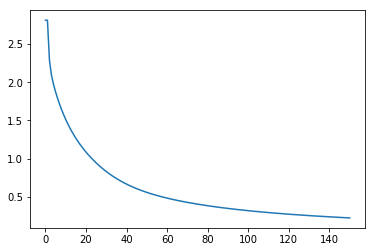

In [282]:
plt.plot(err_reg)
plt.show()

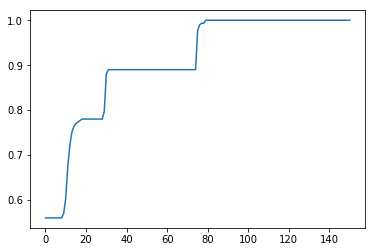

In [283]:
plt.plot(acc_reg)
plt.show()

### Momentum

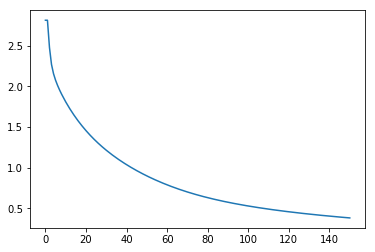

In [284]:
plt.plot(err_mom)
plt.show()

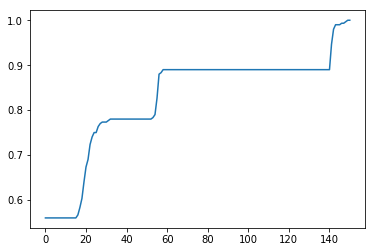

In [285]:
plt.plot(acc_mom)
plt.show()

### Nesterov momentum

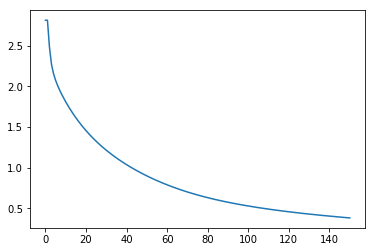

In [286]:
plt.plot(err_nest)
plt.show()

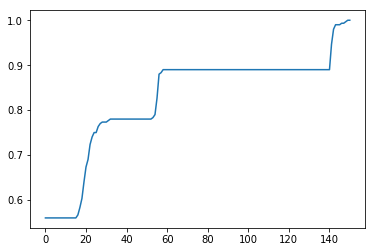

In [287]:
plt.plot(acc_nest)
plt.show()

### ALL

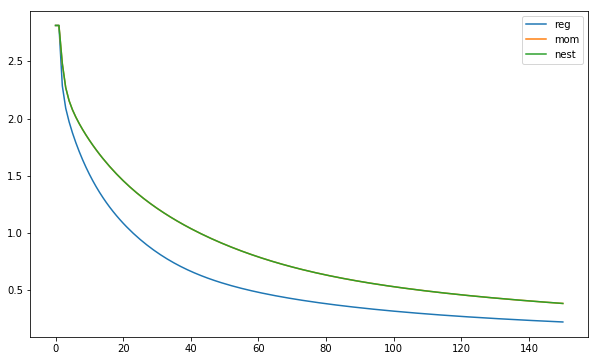

In [298]:
plt.figure(figsize=(10,6))
plt.plot(err_reg, label='reg')
plt.plot(err_mom, label='mom')
plt.plot(err_nest, label='nest')
plt.legend()
plt.show()

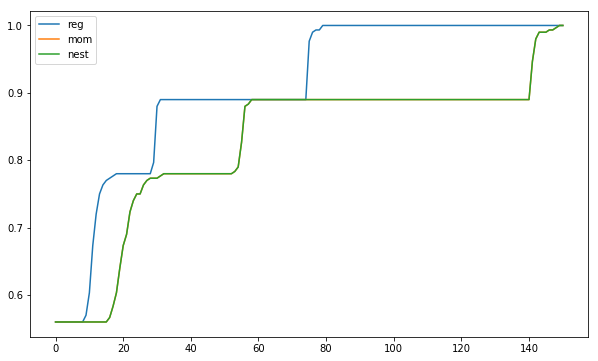

In [299]:
plt.figure(figsize=(10,6))
plt.plot(acc_reg, label='reg')
plt.plot(acc_mom, label='mom')
plt.plot(acc_nest, label='nest')
plt.legend()
plt.show()